# Flight Price Prediction Project

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Problem statement:
#     you have been given a dataset of flights details, 
#     based on this data create a predictive model to predict the prices of fight tickets. 

In [10]:
df=pd.read_csv("Flight_Booking.csv")

In [11]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [12]:
# EDA -Exploratory data analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [15]:
# Removing the unneccesary columns

df.drop(["Unnamed: 0","flight"],axis=1,inplace=True)

In [16]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [17]:
# data cleansing
# null values
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [19]:
# duplicate rows
df.duplicated().sum()

2213

In [21]:
# removing the duplicate values
df.drop_duplicates(inplace=True)

In [22]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297940 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297940 non-null  object 
 1   source_city       297940 non-null  object 
 2   departure_time    297940 non-null  object 
 3   stops             297940 non-null  object 
 4   arrival_time      297940 non-null  object 
 5   destination_city  297940 non-null  object 
 6   class             297940 non-null  object 
 7   duration          297940 non-null  float64
 8   days_left         297940 non-null  int64  
 9   price             297940 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 25.0+ MB


# Visualization

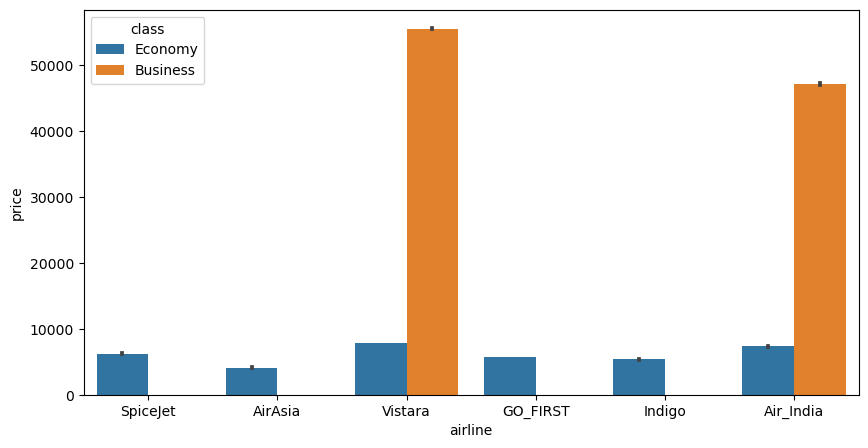

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="airline",y="price",hue="class")
plt.show()

In [ ]:
here we get to know that the prices of Vistara Airlines are more.

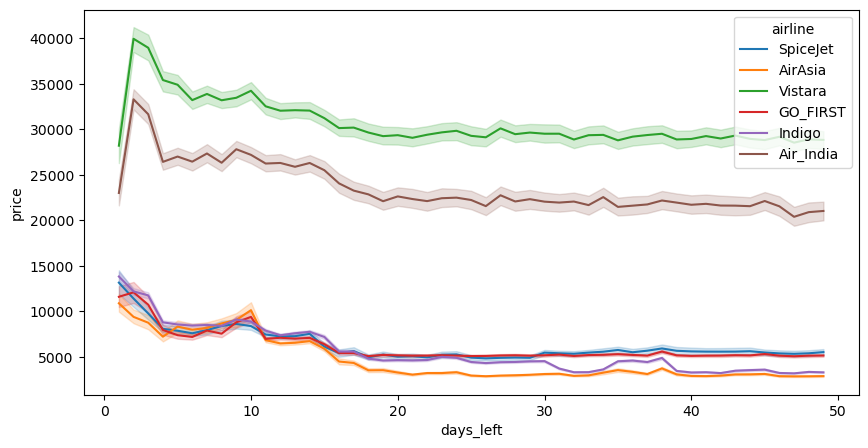

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x="days_left",y="price",hue="airline")
plt.show()

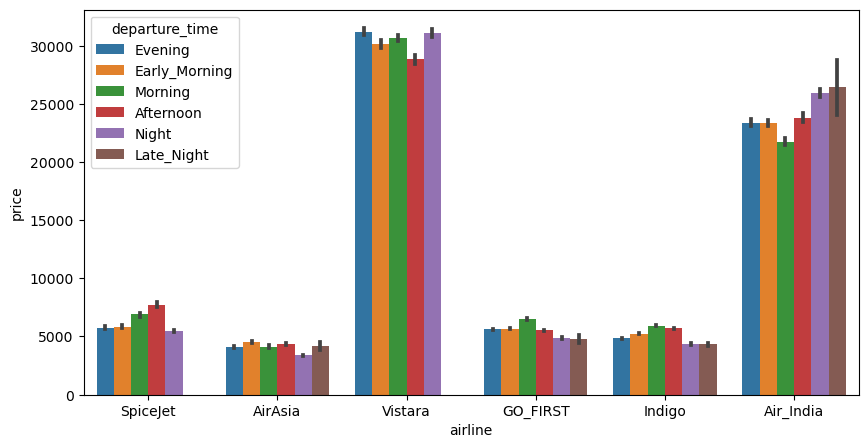

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="airline",y="price",hue="departure_time")
plt.show()

In [ ]:
# rest of the visualization - HOmework

In [37]:
# Data Pre-processing
# Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le=LabelEncoder()

In [40]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [41]:
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=le.fit_transform(df[col])

In [42]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [43]:
# VIf for the Feature selection

In [50]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor

In [53]:
col_list=[]
for i in df.columns:
    if (df[i].dtype!="object") & (i!="price"):
        col_list.append(i)

In [54]:
col_list

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left']

In [55]:
x=df[col_list]

In [56]:
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


In [62]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF values
0,airline,3.382988
1,source_city,2.931342
2,departure_time,2.780203
3,stops,1.407431
4,arrival_time,3.671788
5,destination_city,2.887277
6,class,2.837534
7,duration,4.121452
8,days_left,3.977163


In [63]:
# always drop the column which is having highest VIF values and more than 5

# Feature Scaling

In [64]:
# standardization

In [66]:
from sklearn.preprocessing  import StandardScaler

In [67]:
sc=StandardScaler()

In [68]:
x=sc.fit_transform(x)

In [70]:
x

array([[ 0.49026614, -0.33080864, -0.23847732, ...,  0.67455141,
        -1.40914395, -1.84438245],
       [ 0.49026614, -0.33080864, -0.80833796, ...,  0.67455141,
        -1.38684971, -1.84438245],
       [-1.68861324, -0.33080864, -0.80833796, ...,  0.67455141,
        -1.40914395, -1.84438245],
       ...,
       [ 1.03498599, -0.90177367, -0.80833796, ..., -1.48246669,
         0.2155487 ,  1.69618017],
       [ 1.03498599, -0.90177367, -0.80833796, ..., -1.48246669,
        -0.31811964,  1.69618017],
       [ 1.03498599, -0.90177367,  0.90124395, ..., -1.48246669,
        -0.30697252,  1.69618017]])

In [71]:
x=pd.DataFrame(x,columns=col_list)

In [72]:
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.490266,-0.330809,-0.238477,2.630586,1.107552,1.381764,0.674551,-1.409144,-1.844382
1,0.490266,-0.330809,-0.808338,2.630586,0.533784,1.381764,0.674551,-1.386850,-1.844382
2,-1.688613,-0.330809,-0.808338,2.630586,-1.187518,1.381764,0.674551,-1.409144,-1.844382
3,1.034986,-0.330809,0.901244,2.630586,-1.761286,1.381764,0.674551,-1.397997,-1.844382
4,1.034986,-0.330809,0.901244,2.630586,0.533784,1.381764,0.674551,-1.386850,-1.844382
...,...,...,...,...,...,...,...,...,...
297935,1.034986,-0.901774,0.901244,-0.419568,-0.613751,0.235269,-1.482467,-0.306973,1.696180
297936,1.034986,-0.901774,-1.378199,-0.419568,1.107552,0.235269,-1.482467,-0.259597,1.696180
297937,1.034986,-0.901774,-0.808338,-0.419568,1.107552,0.235269,-1.482467,0.215549,1.696180
297938,1.034986,-0.901774,-0.808338,-0.419568,-0.613751,0.235269,-1.482467,-0.318120,1.696180


In [74]:
x #will be my Independent data
y=df["price"] #dependent

In [75]:
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.490266,-0.330809,-0.238477,2.630586,1.107552,1.381764,0.674551,-1.409144,-1.844382
1,0.490266,-0.330809,-0.808338,2.630586,0.533784,1.381764,0.674551,-1.386850,-1.844382
2,-1.688613,-0.330809,-0.808338,2.630586,-1.187518,1.381764,0.674551,-1.409144,-1.844382
3,1.034986,-0.330809,0.901244,2.630586,-1.761286,1.381764,0.674551,-1.397997,-1.844382
4,1.034986,-0.330809,0.901244,2.630586,0.533784,1.381764,0.674551,-1.386850,-1.844382
...,...,...,...,...,...,...,...,...,...
297935,1.034986,-0.901774,0.901244,-0.419568,-0.613751,0.235269,-1.482467,-0.306973,1.696180
297936,1.034986,-0.901774,-1.378199,-0.419568,1.107552,0.235269,-1.482467,-0.259597,1.696180
297937,1.034986,-0.901774,-0.808338,-0.419568,1.107552,0.235269,-1.482467,0.215549,1.696180
297938,1.034986,-0.901774,-0.808338,-0.419568,-0.613751,0.235269,-1.482467,-0.318120,1.696180


In [76]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 297940, dtype: int64

In [77]:
# let's split the data into training and Testing
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=67)

In [79]:
x_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
187596,1.034986,-0.901774,-1.378199,2.630586,-1.761286,1.381764,0.674551,-1.432832,-0.664195
236065,-1.143893,1.382086,-1.378199,-0.419568,1.107552,0.235269,-1.482467,-0.596798,-1.549336
141887,-0.054454,0.811121,0.901244,-0.419568,-0.613751,0.235269,0.674551,-0.515981,-1.106765
160255,1.034986,0.240156,0.901244,-0.419568,0.533784,1.381764,0.674551,1.702296,-0.074101
142525,-1.143893,0.811121,0.901244,-0.419568,1.107552,0.235269,0.674551,-0.155093,-0.737957
...,...,...,...,...,...,...,...,...,...
201750,1.034986,-0.901774,-0.238477,-0.419568,-0.613751,0.235269,0.674551,2.015808,-0.959242
263715,1.034986,0.811121,0.901244,-0.419568,1.107552,1.381764,-1.482467,-0.341807,0.220946
209801,-1.143893,-0.330809,0.901244,-0.419568,-1.187518,1.381764,-1.482467,1.273132,1.548657
162777,1.034986,0.240156,-1.378199,-0.419568,1.107552,1.381764,0.674551,-0.573110,1.106086


In [81]:
y_train

189390     2960
238183    45693
143480    10373
161904     6885
144118     8764
          ...  
203599    11247
265928    64831
211703    41113
164426     6633
255594    51817
Name: price, Length: 238352, dtype: int64

In [80]:
x_test

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
39468,0.490266,-0.330809,-0.238477,-0.419568,1.107552,-0.911226,0.674551,1.852782,0.442231
161577,-1.143893,0.240156,1.471105,-0.419568,0.533784,1.381764,0.674551,-0.063129,0.589754
5013,-0.599174,-0.330809,-0.238477,-0.419568,-0.039983,1.381764,0.674551,-0.411477,0.073422
251594,1.034986,-1.472739,-0.238477,-0.419568,-0.613751,0.808517,-1.482467,1.412471,-0.664195
87242,-0.599174,-1.472739,-0.238477,-0.419568,1.107552,-0.337978,0.674551,-1.060796,-0.221625
...,...,...,...,...,...,...,...,...,...
112158,1.034986,-1.472739,-0.238477,-0.419568,-1.761286,0.235269,0.674551,0.901097,0.589754
161416,-0.054454,0.240156,-0.238477,-0.419568,-0.613751,1.381764,0.674551,-1.212676,0.515993
247348,1.034986,-1.472739,0.901244,-0.419568,-0.613751,1.381764,-1.482467,-0.851788,-1.033004
222006,1.034986,-0.330809,-0.808338,1.105509,-0.613751,-0.911226,-1.482467,0.019081,0.663516


In [82]:
y_test

40150      4942
163226     3844
5165       3330
253800    51817
88465      7474
          ...  
113597     6133
163065     3557
249552    67004
224039    64801
192977     5037
Name: price, Length: 59588, dtype: int64

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# LinearRegression

In [86]:
lr_model=LinearRegression()

In [87]:
lr_model

LinearRegression()

In [89]:
# training the model 
lr_model.fit(x_train,y_train)

LinearRegression()

In [90]:
# testing model
lr_pred=lr_model.predict(x_test)

In [91]:
lr_pred

array([ 9340.79822264,  5388.86411706,  6654.494435  , ...,
       55479.35842485, 49394.86592285,  8479.52626694])

In [92]:
y_test

40150      4942
163226     3844
5165       3330
253800    51817
88465      7474
          ...  
113597     6133
163065     3557
249552    67004
224039    64801
192977     5037
Name: price, Length: 59588, dtype: int64

In [94]:
# Evaluation of the model
from sklearn.metrics import *

In [101]:
lr_score=r2_score(y_test,lr_pred)
lr_score

0.9050126390563544

In [102]:
lr_rmse=np.sqrt(mean_squared_error(y_test,lr_pred))
lr_rmse

7019.196844128526

# Decision Tree Regressor

In [103]:
dt_model=DecisionTreeRegressor()

In [104]:
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [108]:
dt_pred=dt_model.predict(x_test)

In [109]:
dt_pred

array([ 4942.,  3844.,  3330., ..., 67004., 82553.,  5037.])

In [107]:
y_test

40150      4942
163226     3844
5165       3330
253800    51817
88465      7474
          ...  
113597     6133
163065     3557
249552    67004
224039    64801
192977     5037
Name: price, Length: 59588, dtype: int64

In [111]:
dt_score=r2_score(y_test,dt_pred)
dt_score

0.975802378705843

In [124]:
dt_rmse=np.sqrt(mean_squared_error(y_test,dt_pred))
dt_rmse

3542.752789656515

# Random Forest Regressor

In [113]:
rf_model=RandomForestRegressor()

In [114]:
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [115]:
rf_pred=rf_model.predict(x_test)

In [116]:
rf_pred

array([ 4989.85      ,  3844.        ,  3330.        , ...,
       70178.58      , 78832.86683333,  5000.88      ])

In [117]:
y_test

40150      4942
163226     3844
5165       3330
253800    51817
88465      7474
          ...  
113597     6133
163065     3557
249552    67004
224039    64801
192977     5037
Name: price, Length: 59588, dtype: int64

In [118]:
rf_score=r2_score(y_test,rf_pred)
rf_score

0.9847888557169253

In [119]:
rf_rmse=np.sqrt(mean_squared_error(y_test,rf_pred))
rf_rmse

2808.8946688016576

In [123]:
# Conclusion:
print("Linear Regression- r2_score=",lr_score,"and rmse=",lr_rmse)
print("DT regressor-  r2_score=",dt_score,"and rmse=",dt_rmse)
print("RF regressor-  r2_score=",rf_score,"and rmse=",rf_rmse)

Linear Regression- r2_score= 0.9050126390563544 and rmse= 7019.196844128526
DT regressor-  r2_score= 0.975802378705843 and rmse= 3542.752789656515
RF regressor-  r2_score= 0.9847888557169253 and rmse= 2808.8946688016576


In [ ]:
Best model came out -Random Forest